# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

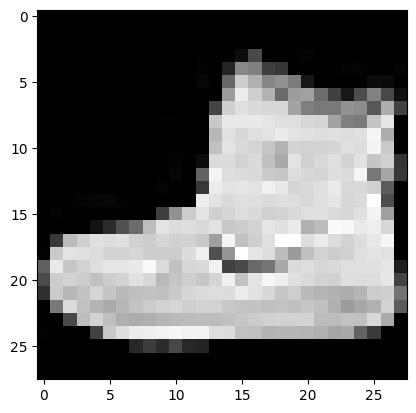

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [6]:
print(f"Training shape: {training_images.shape}")
print(f"Test shape: {test_images.shape}")

Training shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


Los datos de **TRAINING** cuentan con una lista de 60.000 imagenes las cuales cuentan con un tamaño de 28 x 28 pixeles.

Los datos de **TEST** cuentan con una lista de 10.000 imagenes las cuales cuentan con un tamaño de 28 x 28 pixeles.

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

Training
Values: {0.0, 0.7372549019607844, 0.00392156862745098, 0.1607843137254902, 0.403921568627451, 0.21176470588235294, 0.18823529411764706, 0.16862745098039217, 0.3411764705882353, 0.6588235294117647, 0.5215686274509804, 0.06274509803921569}
Tipo de dato: <class 'numpy.float64'>


Y labels
Valores unicos: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Cantidad: 60000


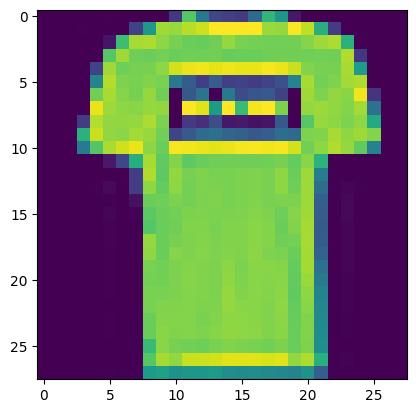

In [7]:
plt.imshow(training_images[1])
print("Training")
print(f"Values: {set(training_images[1][0])}")
print(f"Tipo de dato: {type(training_images[1][1][1])}")


print("\n\nY labels")
print(f"Valores unicos: {set(training_labels)}")
print(f"Cantidad: {len(training_labels)}")


### Training
Las variables training_images y test_imges contienen una lista de imagenes almacenadas en una estructura de narray la cual contiene en su minima expresion el valor de cada pixel que conforma la imagen en cada una de sus posiciones al ser 28 x 28, tal valor corresponde a un numero de tipo float64

### Labels o Y
Al analizar los valores de training_labels y test_labels se identifica que contienen una lista de valores en el rango de 0 a 9, los cuales corresponden al la clasificacion esperada para cada imagen. Es por esto que tanto que training_images y training labels tienen la misma cantidad, pues es una relacion de 1 a 1, como tambien lo es en test_images con test_labels.

## 2. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 2.1 (2 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [8]:
### Tu código para la red neuronal de la pregunta 2 aquí ###

model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(
      training_images,
      training_labels,
      epochs=10,
      batch_size=64,
      validation_data=(test_images, test_labels)
    )

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.5951 - accuracy: 0.8020 - val_loss: 0.4700 - val_accuracy: 0.8339
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4115 - accuracy: 0.8535 - val_loss: 0.4244 - val_accuracy: 0.8460
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3743 - accuracy: 0.8662 - val_loss: 0.4095 - val_accuracy: 0.8509
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3505 - accuracy: 0.8747 - val_loss: 0.3795 - val_accuracy: 0.8657
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3321 - accuracy: 0.8802 - val_loss: 0.3712 - val_accuracy: 0.8676
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.3154 - accuracy: 0.8864 - val_loss: 0.3682 - val_accuracy: 0.8693
Epoch 7/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3047 - accuracy: 0.8893 - val_loss: 0.3572 - val_accuracy: 0.8720
Epoch

### Respuesta

Tal como se solicita, se procede a definir la estructura del modelo con solo una capa oculta de tamaño 128, funcion de activacion sigmoid y una capa final sofmax. Como se puede observar el proceso reduce de forma optima el loss y mejora el acurracy a medida que avanza en cada epochs.


Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2.2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [12]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3356 - accuracy: 0.8806


[0.33555448055267334, 0.8805999755859375]

Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

## 3: Funcionamiento de las predicción de la red neuronal

Sigue los siguientes pasos:

* Crea una variable llamada **classifications** para construir un clasificador con las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones.

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números,
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [13]:
### Tu código del clasificador de la pregunta 3 aquí ###

classifications = model.predict(test_images)
np.set_printoptions(suppress=True)
print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[0.00000553 0.00000081 0.00000755 0.00001834 0.00002232 0.012551   0.00007332 0.06966016 0.00048967 0.9171712 ]


Tu respuesta a la pregunta 3.1 aquí:

El vector generado tiene una longitud de 10, lo cual corresponde con la cantidad de clases posibles a asignar y la probabilidad de pertenecer a cada una de estas.

Tu respuesta a la pregunta 3.2 aquí:

La clase de la primera entrada corresponde a la numero 10, la ultima de este vector dado a que la probabilidad de pertenecer a esta es de 0.9 siendo esta la mayor.

# **4: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **512 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

y entrena la red en ambos casos.



In [20]:
### Tu código para 512 neuronas aquí ###

model_512 = keras.models.Sequential()
model_512.add(keras.layers.Flatten(input_shape=[28,28]))
model_512.add(keras.layers.Dense(512, activation="sigmoid"))
model_512.add(keras.layers.Dense(10, activation="softmax"))

model_512.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_512 = model_512.fit(
      training_images,
      training_labels,
      epochs=10,
      batch_size=64,
      validation_data=(test_images, test_labels)
    )

Epoch 1/10
938/938 [==============================] - 11s 11ms/step - loss: 0.5302 - accuracy: 0.8144 - val_loss: 0.4701 - val_accuracy: 0.8306
Epoch 2/10
938/938 [==============================] - 12s 13ms/step - loss: 0.4001 - accuracy: 0.8556 - val_loss: 0.4082 - val_accuracy: 0.8540
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3658 - accuracy: 0.8675 - val_loss: 0.3888 - val_accuracy: 0.8596
Epoch 4/10
938/938 [==============================] - 8s 8ms/step - loss: 0.3380 - accuracy: 0.8766 - val_loss: 0.3628 - val_accuracy: 0.8715
Epoch 5/10
938/938 [==============================] - 9s 9ms/step - loss: 0.3157 - accuracy: 0.8838 - val_loss: 0.3629 - val_accuracy: 0.8693
Epoch 6/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2970 - accuracy: 0.8904 - val_loss: 0.3467 - val_accuracy: 0.8773
Epoch 7/10
938/938 [==============================] - 8s 8ms/step - loss: 0.2842 - accuracy: 0.8942 - val_loss: 0.3555 - val_accuracy: 0.8721


In [21]:
### Tu código para 1024 neuronas aquí ###

model_1024 = keras.models.Sequential()
model_1024.add(keras.layers.Flatten(input_shape=[28,28]))
model_1024.add(keras.layers.Dense(1024, activation="sigmoid"))
model_1024.add(keras.layers.Dense(10, activation="softmax"))

model_1024.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_1024 = model_1024.fit(
      training_images,
      training_labels,
      epochs=10,
      batch_size=64,
      validation_data=(test_images, test_labels)
    )

Epoch 1/10
938/938 [==============================] - 15s 15ms/step - loss: 0.5225 - accuracy: 0.8138 - val_loss: 0.4641 - val_accuracy: 0.8291
Epoch 2/10
938/938 [==============================] - 14s 15ms/step - loss: 0.3999 - accuracy: 0.8557 - val_loss: 0.4000 - val_accuracy: 0.8594
Epoch 3/10
938/938 [==============================] - 14s 15ms/step - loss: 0.3614 - accuracy: 0.8683 - val_loss: 0.3865 - val_accuracy: 0.8610
Epoch 4/10
938/938 [==============================] - 14s 15ms/step - loss: 0.3355 - accuracy: 0.8772 - val_loss: 0.3966 - val_accuracy: 0.8532
Epoch 5/10
938/938 [==============================] - 14s 15ms/step - loss: 0.3128 - accuracy: 0.8854 - val_loss: 0.3554 - val_accuracy: 0.8713
Epoch 6/10
938/938 [==============================] - 14s 15ms/step - loss: 0.2926 - accuracy: 0.8923 - val_loss: 0.3471 - val_accuracy: 0.8757
Epoch 7/10
938/938 [==============================] - 14s 15ms/step - loss: 0.2774 - accuracy: 0.8965 - val_loss: 0.3467 - val_accuracy:

**pregunta 4.1 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

Tu respuesta a la pregunta 4.1 aquí:



*   Dado el aumento en la cantidad de neuronas en la capa oculta, el tiempo de procesamiento aumento, esto es dado al aumento en la cantidad de operaciones a realizar.

*   Se identifica que al tener 512 neuronas se alcanza un accurracy con el conjunto de test de 0.8817 mientras que con 1024 neuronas se llega a un 0.8790 lo cual puede ser explicado por el overfitting, se esta perdiendo generalidad del predictor al sobre entrenar.

* Ambos modelos tienen un buen acurracy, sin embargo, dada la poca diferencia, lo mejor seria el modelo de 512 neuronas dado al menor esfuerzo en cuanto procesamiento y tiempo

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 4.2 (0.25 puntos)**:

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 4.3 (0.25 puntos)**:

* ¿Porque crees que ha ocurrido esto?

In [22]:
### Tu código del clasificador de la pregunta  aquí ###

classifications_512 = model_512.predict(test_images)
np.set_printoptions(suppress=True)
print(classifications_512[0])

313/313 [==============================] - 1s 3ms/step
[0.0000003  0.00000002 0.00000032 0.00000013 0.00000216 0.00638571 0.00000588 0.01115674 0.00000607 0.9824426 ]


In [23]:
classifications_1024 = model_1024.predict(test_images)
np.set_printoptions(suppress=True)
print(classifications_1024[0])

313/313 [==============================] - 1s 4ms/step
[0.00000278 0.00000003 0.0000015  0.0000003  0.00000126 0.00927269 0.00002289 0.02144261 0.0000067  0.9692492 ]


Tu respuesta a la pregunta 4.2 aquí:

Para el modelo con 512 neuronas se encuentra clasificado en la clase 10 con un 98.2 % de probabilidad.

Para el modelo con 1024 neuronas se encuentra clasificado en la clase 10 con un 96.2 % de probabilidad.

Tu respuesta a la pregunta 5.2 aquí:

Dado a que generalmente agregar una mayor cantidad de neuronas, aumenta la capacidad de la red para aprender, el modelo mejoro su precision, en efecto, para ambos casos, clasifico en la clase 10, sin embargo, recordemos que despues de cierto punto puede perder su capacidad de generalizar frente a nuevos datos, y perder su rendimiento teninedo neuronas en exceso.

# **5: Capa Flatten**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 5 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [24]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###

model= keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

try:
  history = model.fit(
        training_images,
        training_labels,
        epochs=10,
        batch_size=64,
        validation_data=(test_images, test_labels)
      )
except Exception as e:
    print(f"An error occurred: {e}")

Epoch 1/10
An error occurred: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.

Tu respuesta a la pregunta 5 aquí:

Dado a que estamos borrando la capa Flatten estamos eliminando la transformacion inicial que convierte los valores de las imagens a un vector, el cual es esperado por las capas ocultas, es por esto que tenemos el error, no puede tener mas dimensiones de las esperadas.  

# **6: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10?

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [25]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 6 aquí ###

model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dense(5, activation="softmax"))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
  )

Epoch 1/10


InvalidArgumentError: ignored

Tu respuestas a la pregunta 6.1 aquí:

La cantidad de neuronas de la capa de salida esta determinada por la cantidad de clases posibles a asignar dado a que cada neuronada brindara una probabilidad de pertenecer o no a una unica clase. Dado a que son 10 clases posibles, vamos a calcular 10 probabilidades.

Tu respuestas a la pregunta 6.2 aquí:
La red genera el siguiente error:
Received a label value of 9 which is outside the valid range of [0, 5).

Esto es porque espera una cantidad de 5 labels posibles, sin embargo, los datos de entrenamiento tienen mas valore no esperados, mas especificamente 10.



# 7: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 7.1 (0.15 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 7.2 (0.15 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 7.3 (0.30 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [ ]:
### Tu código para 15 epoch aquí ###

model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(
    training_images,
    training_labels,
    epochs=15,
    batch_size=64,
    validation_data=(test_images, test_labels)
  )

Epoch 1/15
938/938 [==============================] - 19s 3ms/step - loss: 0.6017 - accuracy: 0.8019 - val_loss: 0.4702 - val_accuracy: 0.8345
Epoch 2/15
938/938 [==============================] - 2s 2ms/step - loss: 0.4113 - accuracy: 0.8540 - val_loss: 0.4142 - val_accuracy: 0.8512
Epoch 3/15
938/938 [==============================] - 2s 3ms/step - loss: 0.3738 - accuracy: 0.8658 - val_loss: 0.4031 - val_accuracy: 0.8533
Epoch 4/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3497 - accuracy: 0.8747 - val_loss: 0.3831 - val_accuracy: 0.8648
Epoch 5/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3317 - accuracy: 0.8807 - val_loss: 0.3624 - val_accuracy: 0.8702
Epoch 6/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3162 - accuracy: 0.8860 - val_loss: 0.3616 - val_accuracy: 0.8694
Epoch 7/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3031 - accuracy: 0.8891 - val_loss: 0.3467 - val_accuracy: 0.8746
Epoch

In [ ]:
### Tu código para 30 epoch aquí ###

model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(
    training_images,
    training_labels,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels)
  )

Epoch 1/30
938/938 [==============================] - 3s 3ms/step - loss: 0.5968 - accuracy: 0.8014 - val_loss: 0.4669 - val_accuracy: 0.8353
Epoch 2/30
938/938 [==============================] - 2s 3ms/step - loss: 0.4124 - accuracy: 0.8539 - val_loss: 0.4181 - val_accuracy: 0.8503
Epoch 3/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3732 - accuracy: 0.8664 - val_loss: 0.4004 - val_accuracy: 0.8562
Epoch 4/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3497 - accuracy: 0.8738 - val_loss: 0.3785 - val_accuracy: 0.8643
Epoch 5/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3305 - accuracy: 0.8800 - val_loss: 0.3698 - val_accuracy: 0.8663
Epoch 6/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3154 - accuracy: 0.8854 - val_loss: 0.3716 - val_accuracy: 0.8620
Epoch 7/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3021 - accuracy: 0.8901 - val_loss: 0.3596 - val_accuracy: 0.8709
Epoch 

Tu respuesta a la pregunta 7.3 aquí:

Si, esto se debe a que despues de cierto punto el modelo alcanza su maximo valor de aprendizaje, y por el contrario, pierde su capacidad de aprendizaje o generalizacion respecto a nuevos datos. El nombre de este efecto es overfitting.

# 8: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Ejercicio 8 *(0.75 puntos)***: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [ ]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        current_loss = logs.get('loss')
        target_loss = 0.4
        if current_loss <= target_loss:
            print("\n\n=========================")
            print(f"Target loss alcanzada ({current_loss} <= {target_loss})")
            print("Deteniendo el entrenamiento.")
            print("=========================\n\n")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.13.0
Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4785 - accuracy: 0.8282
Epoch 2/50
1864/1875 [============================>.] - ETA: 0s - loss: 0.3603 - accuracy: 0.8667

Target loss alcanzada (0.35994863510131836 <= 0.4)
Deteniendo el entrenamiento.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.3599 - accuracy: 0.8668


## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 9 *(0.75 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

# Utilizando la funcion de activacion sigmoid

Epoch 1/10
938/938 [==============================] - 15s 14ms/step - loss: 0.9217 - accuracy: 0.6262 - val_loss: 0.6443 - val_accuracy: 0.7627
Epoch 2/10
938/938 [==============================] - 13s 14ms/step - loss: 0.4710 - accuracy: 0.8329 - val_loss: 0.4435 - val_accuracy: 0.8442
Epoch 3/10
938/938 [==============================] - 13s 13ms/step - loss: 0.4018 - accuracy: 0.8572 - val_loss: 0.4264 - val_accuracy: 0.8492
Epoch 4/10
938/938 [==============================] - 13s 14ms/step - loss: 0.3731 - accuracy: 0.8662 - val_loss: 0.4024 - val_accuracy: 0.8589
Epoch 5/10
938/938 [==============================] - 13s 14ms/step - loss: 0.3461 - accuracy: 0.8754 - val_loss: 0.4001 - val_accuracy: 0.8584
Epoch 6/10
938/938 [==============================] - 13s 13ms/step - loss: 0.3273 - accuracy: 0.8820 - val_loss: 0.3663 - val_accuracy: 0.8709
Epoch 7/10
938/938 [==============================] - 15s 16ms/step - loss: 0.3130 - accuracy: 0.8866 - val_loss: 0.4098 - val_accuracy:

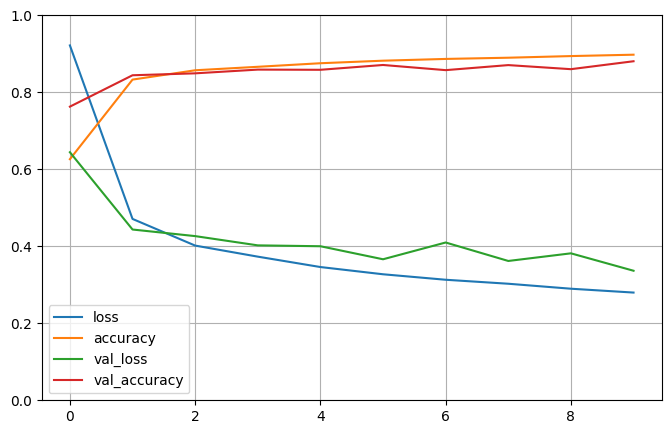

In [ ]:
import time
inicio = time.time()


model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(300, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
  )

fin = time.time()
tiempo_transcurrido = fin - inicio
print(f"El código tardó {tiempo_transcurrido} segundos en ejecutarse.")

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Utilizando la funcion de activacion relu

Epoch 1/10
938/938 [==============================] - 14s 13ms/step - loss: 0.4995 - accuracy: 0.8168 - val_loss: 0.4811 - val_accuracy: 0.8090
Epoch 2/10
938/938 [==============================] - 12s 13ms/step - loss: 0.3752 - accuracy: 0.8630 - val_loss: 0.3860 - val_accuracy: 0.8640
Epoch 3/10
938/938 [==============================] - 12s 13ms/step - loss: 0.3376 - accuracy: 0.8771 - val_loss: 0.3958 - val_accuracy: 0.8611
Epoch 4/10
938/938 [==============================] - 12s 13ms/step - loss: 0.3180 - accuracy: 0.8831 - val_loss: 0.3564 - val_accuracy: 0.8763
Epoch 5/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2965 - accuracy: 0.8906 - val_loss: 0.3483 - val_accuracy: 0.8795
Epoch 6/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2807 - accuracy: 0.8967 - val_loss: 0.3356 - val_accuracy: 0.8804
Epoch 7/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2716 - accuracy: 0.8989 - val_loss: 0.3503 - val_accuracy:

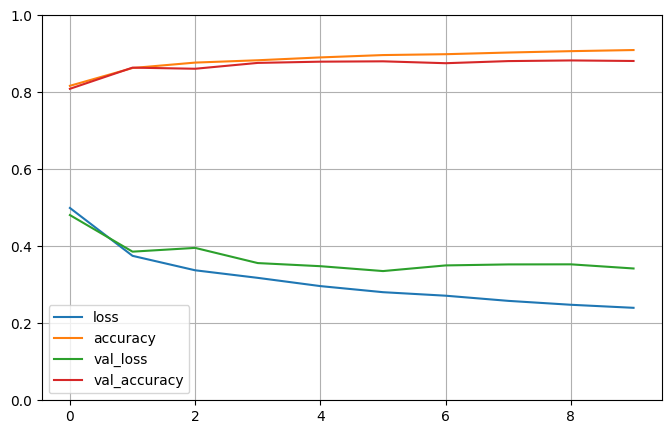

In [ ]:
import time
inicio = time.time()

model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
  )

fin = time.time()
tiempo_transcurrido = fin - inicio
print(f"El código tardó {tiempo_transcurrido} segundos en ejecutarse.")

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Resultado analisis

Las siguientes son observaciones identificadas a raiz del proceso

* La funcion de activacion relu resulta ser mas eficiente dada a su simplicidad. Mejorando los tiempos de ejecucion
* La red neuronal puede converger mas rapidamente, el ejemplo actual, vemos como el modelo con relu llego a un accuracy del 80% en menos epochs que sigmoid
*   Dado aque imprimimos el tiempo de ejecucion, es evidente que pese a tener los mismos parametros de configuracion, la red entreganada con las capas ocultas sigmoid tardaron mas en su proceso de entrenamiento que la red con relu. Esto lo puede verificar en el valor impreso para sus tiempos
* La funcion sigmoid, ademas, dado su forma, tiende a saturar los valores, lo cual, a lo largo del tiempo puede implicar problemas con valores muy grandes o muy pequeños






## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 10 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

# inicialización con ceros.

Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 

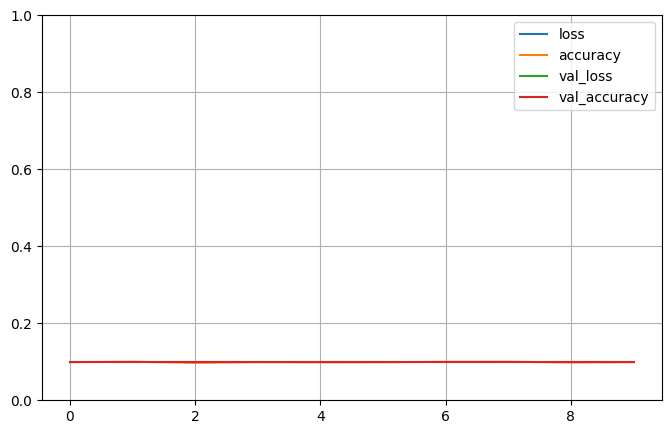

In [33]:
import time
inicio = time.time()

model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer='zeros'))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
  )

fin = time.time()
tiempo_transcurrido = fin - inicio
print(f"El código tardó {tiempo_transcurrido} segundos en ejecutarse.")

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Inicialización con una variable aleatoria normal.



Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 1.0984 - accuracy: 0.7557 - val_loss: 0.6824 - val_accuracy: 0.8085
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.5519 - accuracy: 0.8312 - val_loss: 0.5880 - val_accuracy: 0.8209
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.4416 - accuracy: 0.8529 - val_loss: 0.5192 - val_accuracy: 0.8274
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3878 - accuracy: 0.8645 - val_loss: 0.4489 - val_accuracy: 0.8533
Epoch 5/10
938/938 [==============================] - 8s 8ms/step - loss: 0.3556 - accuracy: 0.8736 - val_loss: 0.4235 - val_accuracy: 0.8596
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3293 - accuracy: 0.8804 - val_loss: 0.4297 - val_accuracy: 0.8523
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3114 - accuracy: 0.8872 - val_loss: 0.4093 - val_accuracy: 0.8587
Epoch 

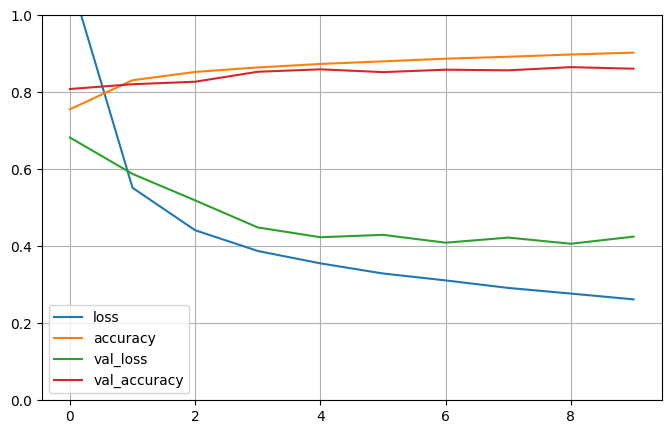

In [34]:
import time
inicio = time.time()

model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(
                        300,
                        activation="relu",
                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0)
                        )
)
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
  )

fin = time.time()
tiempo_transcurrido = fin - inicio
print(f"El código tardó {tiempo_transcurrido} segundos en ejecutarse.")

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Inicialización con los valores por defecto de Keras para una capa Dense (estrategia glorot uniform)

Epoch 1/10
938/938 [==============================] - 7s 6ms/step - loss: 0.4948 - accuracy: 0.8256 - val_loss: 0.4217 - val_accuracy: 0.8487
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3687 - accuracy: 0.8663 - val_loss: 0.3911 - val_accuracy: 0.8568
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3327 - accuracy: 0.8774 - val_loss: 0.3767 - val_accuracy: 0.8664
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3056 - accuracy: 0.8871 - val_loss: 0.3441 - val_accuracy: 0.8770
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2874 - accuracy: 0.8939 - val_loss: 0.3681 - val_accuracy: 0.8673
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2709 - accuracy: 0.8996 - val_loss: 0.3346 - val_accuracy: 0.8753
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2562 - accuracy: 0.9046 - val_loss: 0.3419 - val_accuracy: 0.8831
Epoch 

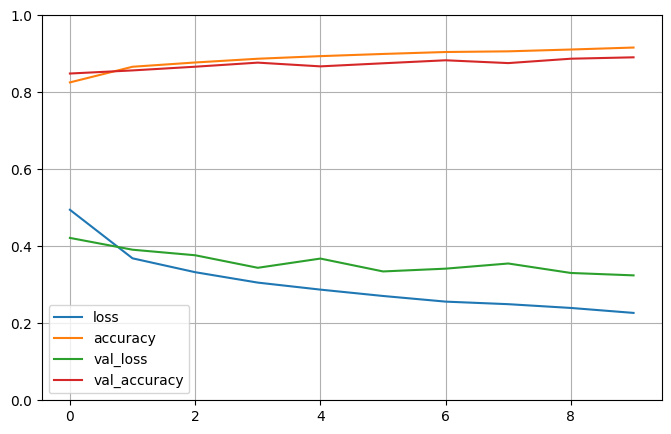

In [35]:
import time
inicio = time.time()

model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
  )

fin = time.time()
tiempo_transcurrido = fin - inicio
print(f"El código tardó {tiempo_transcurrido} segundos en ejecutarse.")

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Resultados:

Luego de realizar las 3 inicializaciones solicitadas, resulta interesante evidenciar el efecto de cada paso sobre la red.



*   Si inicializamos los pesos de la red en cero, tendremos un impacto directo en el proceso de aprendizaje de la red neuronal. Esto se debe a que todas las neuronas en la capa compartirán el mismo valor inicial, lo que resultará en que todas ellas aprendan idénticas representaciones de los datos.

*   En este caso en particular, iniciar con los pesos distribuidos normalmente permite a la red inicializar y aprender de forma adecuada, sin embargo, evidenciamos que el loss inicial es muy grande, y definitivamente requirio un ajuste mayor.

* Iniciaalizar los pesos con la configuracion estandar de Keras brindo el mejor punto inicial, totalmente en comparacion con la inicializacion de pesos en cero, y brindo un mejor punto de inicio que la distribucion normal.



## 11. Optimizadores

**Ejercicio 11 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

# Red con optimizador SGD

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.8560 - accuracy: 0.7340 - val_loss: 0.6434 - val_accuracy: 0.7858
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.5715 - accuracy: 0.8124 - val_loss: 0.5591 - val_accuracy: 0.8097
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.5148 - accuracy: 0.8272 - val_loss: 0.5239 - val_accuracy: 0.8187
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.4851 - accuracy: 0.8345 - val_loss: 0.4982 - val_accuracy: 0.8286
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.4655 - accuracy: 0.8408 - val_loss: 0.4999 - val_accuracy: 0.8266
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.4504 - accuracy: 0.8450 - val_loss: 0.4710 - val_accuracy: 0.8362
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4392 - accuracy: 0.8493 - val_loss: 0.4728 - val_accuracy: 0.8368
Epoch 

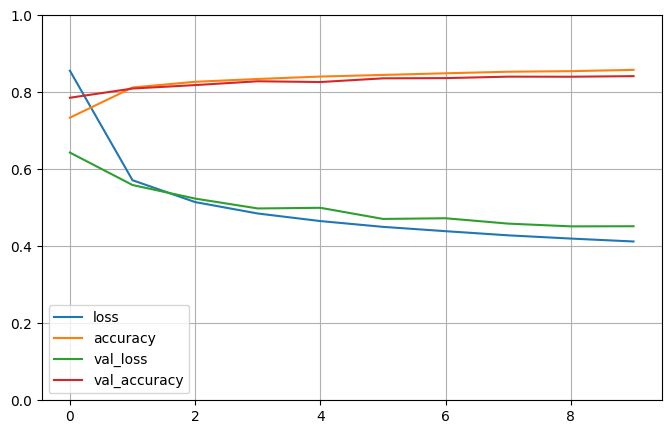

In [36]:
import time
inicio = time.time()

model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='sgd',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
  )

fin = time.time()
tiempo_transcurrido = fin - inicio
print(f"El código tardó {tiempo_transcurrido} segundos en ejecutarse.")

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Red con optimizador ADAM

Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.4964 - accuracy: 0.8281 - val_loss: 0.4189 - val_accuracy: 0.8508
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3690 - accuracy: 0.8664 - val_loss: 0.3977 - val_accuracy: 0.8542
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3306 - accuracy: 0.8793 - val_loss: 0.3654 - val_accuracy: 0.8669
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3060 - accuracy: 0.8876 - val_loss: 0.3495 - val_accuracy: 0.8731
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2850 - accuracy: 0.8953 - val_loss: 0.3334 - val_accuracy: 0.8808
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2732 - accuracy: 0.8988 - val_loss: 0.3433 - val_accuracy: 0.8782
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2594 - accuracy: 0.9044 - val_loss: 0.3275 - val_accuracy: 0.8828
Epoch 

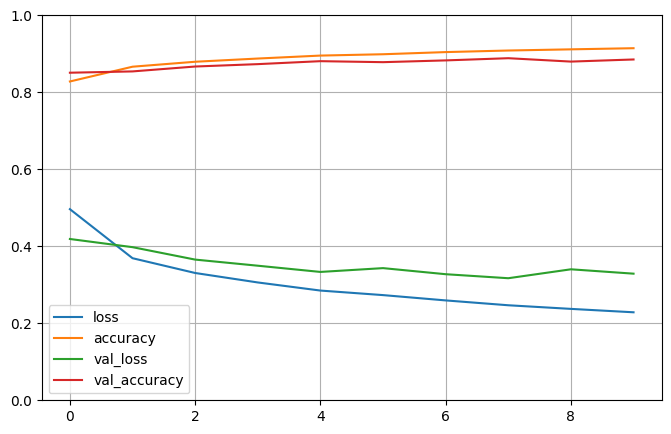

In [37]:
import time
inicio = time.time()

model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
  )

fin = time.time()
tiempo_transcurrido = fin - inicio
print(f"El código tardó {tiempo_transcurrido} segundos en ejecutarse.")

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Red con optimizador RMSPROP

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.5147 - accuracy: 0.8154 - val_loss: 0.4979 - val_accuracy: 0.8298
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3708 - accuracy: 0.8645 - val_loss: 0.4166 - val_accuracy: 0.8422
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3336 - accuracy: 0.8783 - val_loss: 0.3892 - val_accuracy: 0.8596
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3104 - accuracy: 0.8861 - val_loss: 0.3902 - val_accuracy: 0.8682
Epoch 5/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2914 - accuracy: 0.8940 - val_loss: 0.3577 - val_accuracy: 0.8696
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2791 - accuracy: 0.8976 - val_loss: 0.3445 - val_accuracy: 0.8814
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2681 - accuracy: 0.9014 - val_loss: 0.3599 - val_accuracy: 0.8713
Epoch 

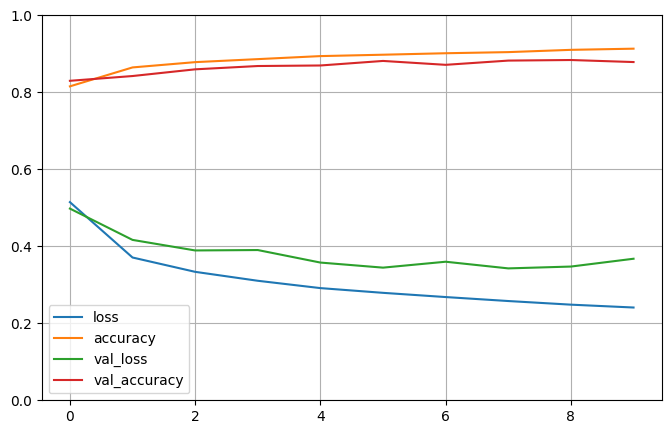

In [38]:
import time
inicio = time.time()

model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer='rmsprop',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = model.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
  )

fin = time.time()
tiempo_transcurrido = fin - inicio
print(f"El código tardó {tiempo_transcurrido} segundos en ejecutarse.")

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Resultados

Las diferencias entre los tres modelos se pueden observar principalmente en los valores de pérdida y precisión en el conjunto de entrenamiento y en el conjunto de validación, así como en el tiempo de ejecución. Aquí están las principales diferencias entre los modelos:

Modelo 1:

Pérdida final en el conjunto de validación: 0.4520
Precisión final en el conjunto de validación: 0.8419
Tiempo de ejecución: Aproximadamente 82.87 segundos
Modelo 2:

Pérdida final en el conjunto de validación: 0.3289
Precisión final en el conjunto de validación: 0.8852
Tiempo de ejecución: Aproximadamente 62.32 segundos
Modelo 3:

Pérdida final en el conjunto de validación: 0.3676
Precisión final en el conjunto de validación: 0.8785
Tiempo de ejecución: Aproximadamente 58.85 segundos
Las diferencias clave a destacar son:

Pérdida y precisión en el conjunto de validación: El Modelo 2 tiene la pérdida más baja en el conjunto de validación (0.3289) y la precisión más alta (0.8852), lo que indica que tiene el mejor rendimiento en datos no vistos.

Tiempo de ejecución: El Modelo 1 tiene el tiempo de ejecución más largo (aproximadamente 82.87 segundos), seguido por el Modelo 2 (aproximadamente 62.32 segundos) y el Modelo 3 (aproximadamente 58.85 segundos). Esto podría ser importante si la eficiencia en el tiempo de entrenamiento es una consideración.

En resumen, el Modelo 2 es el que muestra el mejor rendimiento en términos de precisión en el conjunto de validación, lo que sugiere que es el más efectivo para generalizar en datos no vistos. Sin embargo, el Modelo 3 también muestra un buen rendimiento.

## 12. Regularización y red final *(1.25 puntos)*

**Ejercicio 12 *(1 punto)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [16]:
import time
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')> 0.9):
              print("\nAlcanzado el 90% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True


inicio = time.time()

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(400, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = myCallback()

history = model.fit(
    training_images,
    training_labels,
    epochs=100,
    batch_size=100,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

fin = time.time()
tiempo_transcurrido = fin - inicio
print(f"El código tardó {tiempo_transcurrido} segundos en ejecutarse.")


Epoch 1/100
600/600 [==============================] - 9s 13ms/step - loss: 0.4896 - accuracy: 0.8248 - val_loss: 0.4041 - val_accuracy: 0.8535
Epoch 2/100
600/600 [==============================] - 7s 11ms/step - loss: 0.3585 - accuracy: 0.8673 - val_loss: 0.3806 - val_accuracy: 0.8600
Epoch 3/100
600/600 [==============================] - 6s 10ms/step - loss: 0.3163 - accuracy: 0.8824 - val_loss: 0.3484 - val_accuracy: 0.8707
Epoch 4/100
600/600 [==============================] - 7s 12ms/step - loss: 0.2938 - accuracy: 0.8901 - val_loss: 0.3411 - val_accuracy: 0.8769
Epoch 5/100
600/600 [==============================] - 6s 10ms/step - loss: 0.2754 - accuracy: 0.8974 - val_loss: 0.3359 - val_accuracy: 0.8798
Epoch 6/100
600/600 [==============================] - 7s 12ms/step - loss: 0.2603 - accuracy: 0.9028 - val_loss: 0.3300 - val_accuracy: 0.8797
Epoch 7/100
600/600 [==============================] - 6s 10ms/step - loss: 0.2484 - accuracy: 0.9059 - val_loss: 0.3302 - val_accuracy:

Se alcanz el 90% de precision para el val_acurracy.La metodologia usada es:

*   Se implementan dos capas densas con funcion de activacion relu ya que funcionan de la mejor forma.
*   se utiliza un early stopping el cual detuvo el aprendizaje cuando el val_acurracy llego al 90%
* El optimizer seleccionado es el Adam, dado a que mostro el mejor rendimiento en las pruebas realizadas
* Se aumento el numero de epochs dado a que utilizaremos un early stopping.
* Se altera el batch size con el objetivo de aumentar el tamaño de la muestra e incrementar su posibilidad de generalizacion y rating de aprendizaje.

